# Kidney Disease Status  Prediction
### Md Ruhul Amin
##### mdruhul.amin@northsouth.edu
#### https://github.com/ruhulamin005/
#### Project Link: https://github.com/ruhulamin005/Predict-status-of-Chronic-kidney-disease

In [1]:
#Preprocessing
# preparing for modeling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\Python\pyLearning\Dataset\kidney\kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#changing column name with a smarter approach

In [6]:
columns = pd.read_csv('D:/Python/pyLearning/Dataset/kidney/data_description.txt',sep='-')

In [7]:
columns = columns.reset_index()

In [8]:
columns.columns = ['cols','abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [9]:
#renaming columns names

In [10]:
df.columns = columns['abb_col_names'].values

In [11]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [17]:
#coverting data_types
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors='coerce')

In [18]:
features = ['packed cell volume','white blood cell count','red blood cell count']

for feature in features:
    convert_dtype(df,feature)

In [15]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [16]:
df.drop('id',axis=1, inplace=True)

In [19]:
#Data Cleaning for analysing data

In [20]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [69]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [70]:
cat_col,num_col=extract_cat_num(df)

In [71]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [72]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [82]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has [None] values 


coronary artery disease has [None] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'notckd'] values 




In [74]:
#Here we have some unwanted situation
#Cleaning 

In [85]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')


In [86]:
#Checiking Values
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has [None] values  


coronary artery disease has [None] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




In [87]:
#Distribution Of Data

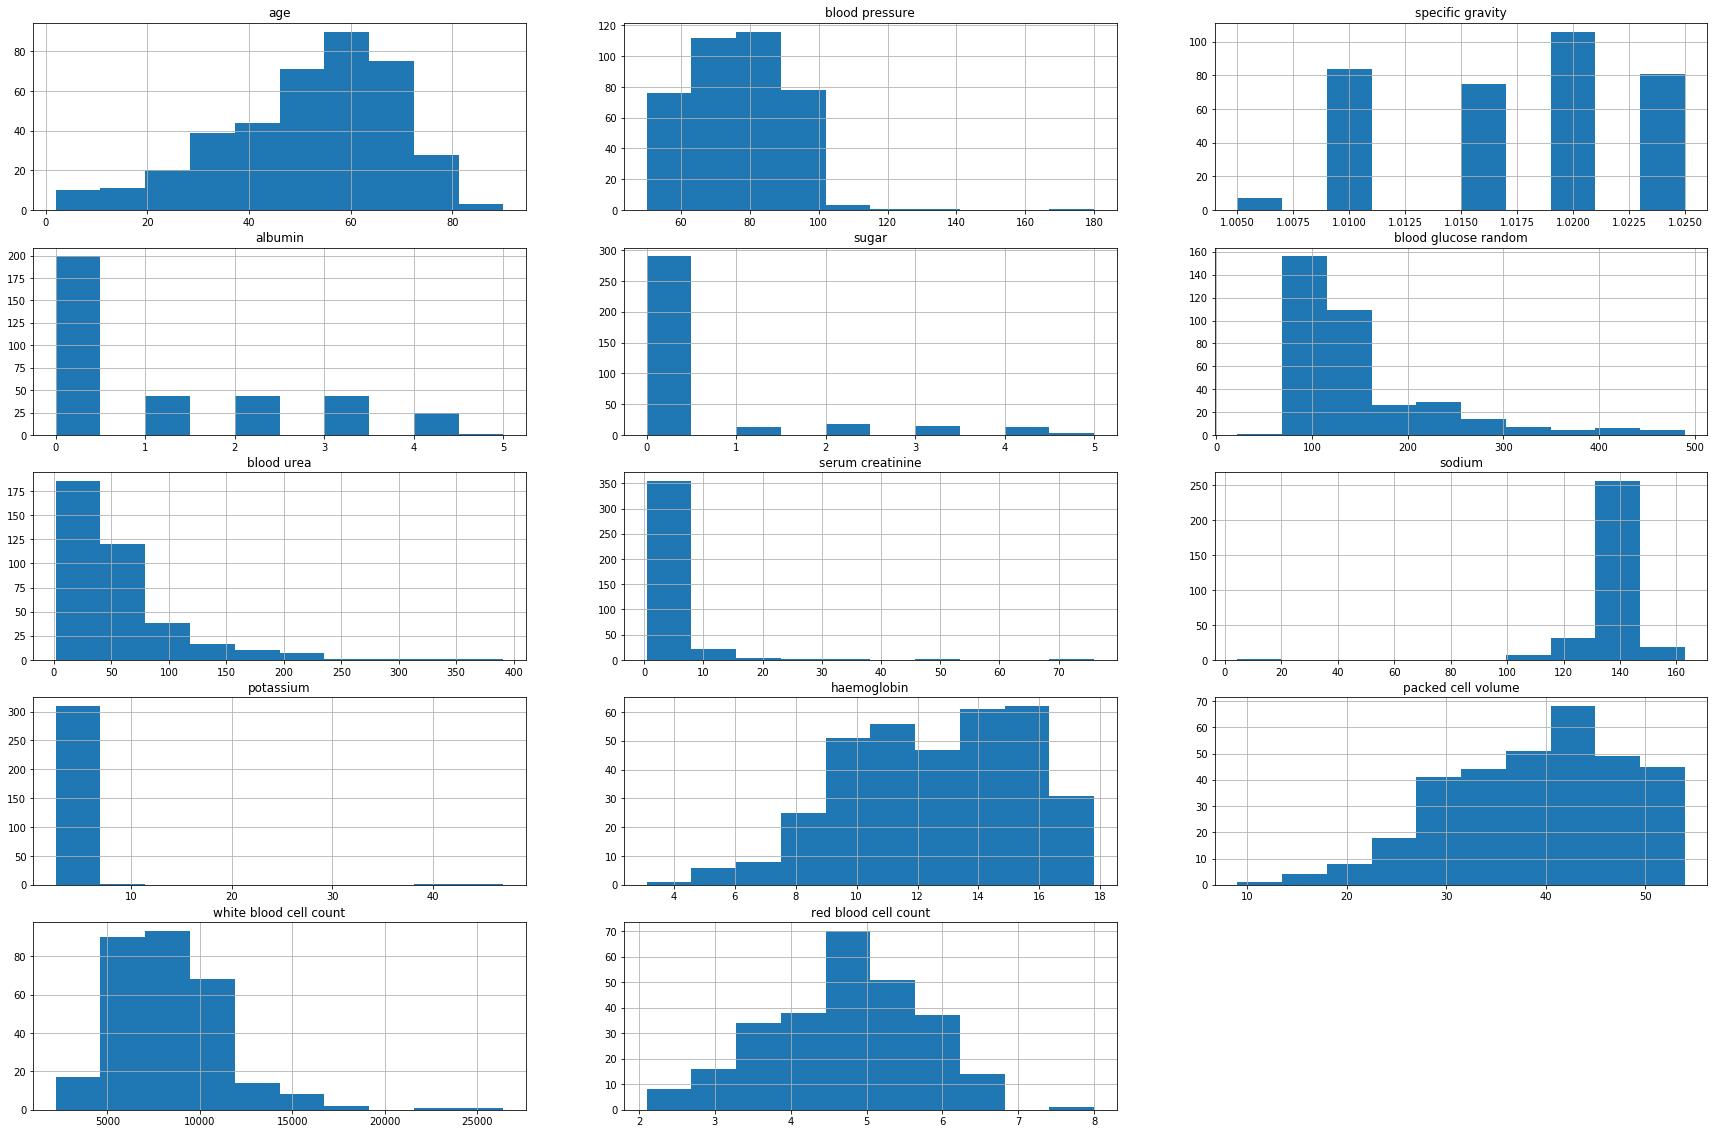

In [88]:
plt.figure(figsize=(30,20))

for i, feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

In [89]:
#Label Disribution of categorial data

In [90]:
## ckd, notckd
len(cat_col)

11

ValueError: min() arg is an empty sequence

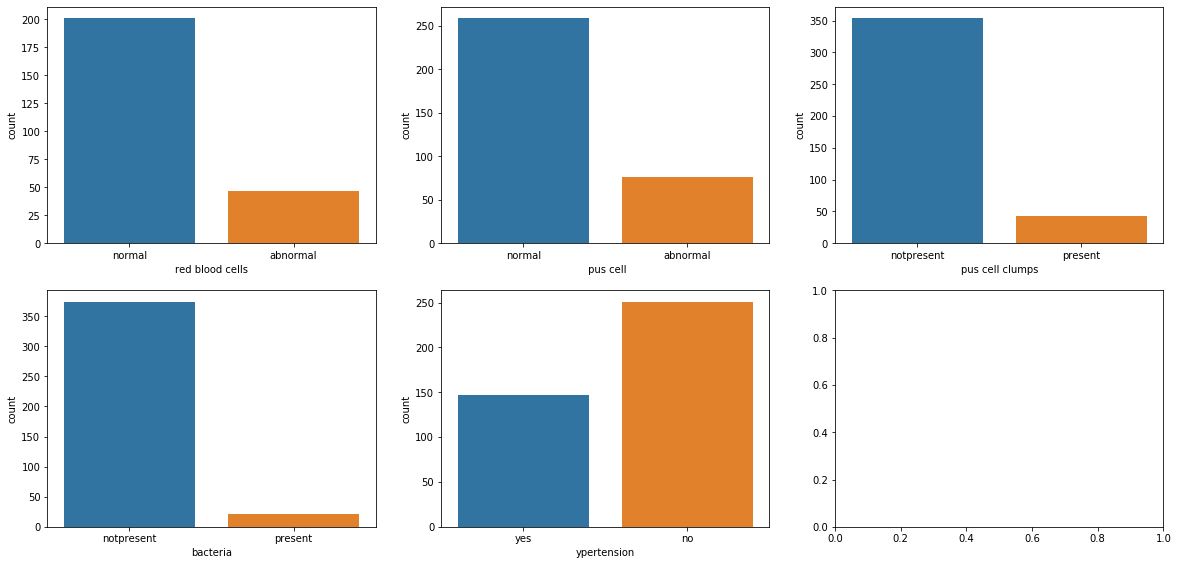

In [91]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    